### Data Description

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

### Import Packages

In [1]:
import pandas as pd
import numpy as np

#Data Visuallization

%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

#Suppress Warnings
import warnings
warnings.filterwarnings('ignore')


random_state = 42
np.random.seed(random_state)


Reading the data as dataframe ,print first five rows and check number of rows and columns

In [2]:
bank = pd.read_csv(r'C:\Users\aryav\Desktop\Kaggle_Competitions\Portugese Bank Mktng Campaign\bank-full.csv')

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank.shape

(45211, 17)

The data contains 45211 rows and 17 columns. Let us get the information on the columns

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


None of the columns have missing values. 

#### Statistical Summary for numerical columns

In [6]:
bank.describe(exclude = 'object').T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


**Age:** The value of age ranges from 18 yrs to 95 yrs. The mean age of the population is ~ 41 yrs.

**Balance:** The value ranges from -8019 euros to 102,127 euros. This is very large range.

**Duration:**  Min value being 0 and max value being 4918. It would be important to check if higher duration of call leading to more subscription.

**pdays:** The range for this columns is -1 to 871. Minimum number of days that passed by after the client was last contacted from a previous campaign being -1 which is the dummy value for the cases where client wasn't contacted.

**previous** The range for this column is 0 to 275. The minimum value for this column is 0 which suggests that the client was not contacted before this campaign. 

#### Statistical Summary for Categorical columns

In [7]:
bank.describe(exclude = 'number').T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


**job:** Nominal.The most frequently occurring value for this variable is 'blue collar'

**marital:** Nominal. Most of the clients in our dataset are married.

**education:** Ordinal .Most of the clients in our dataset have secondary education

**default:** Binary. Most of clients don't have credit in default.

**housing:** Binary. Most of the clients have housing loan.

**loan:** Binary. Most of the clients do not have personal loan.




### Exploratory Data Analysis

#### Distribution of numerical variables

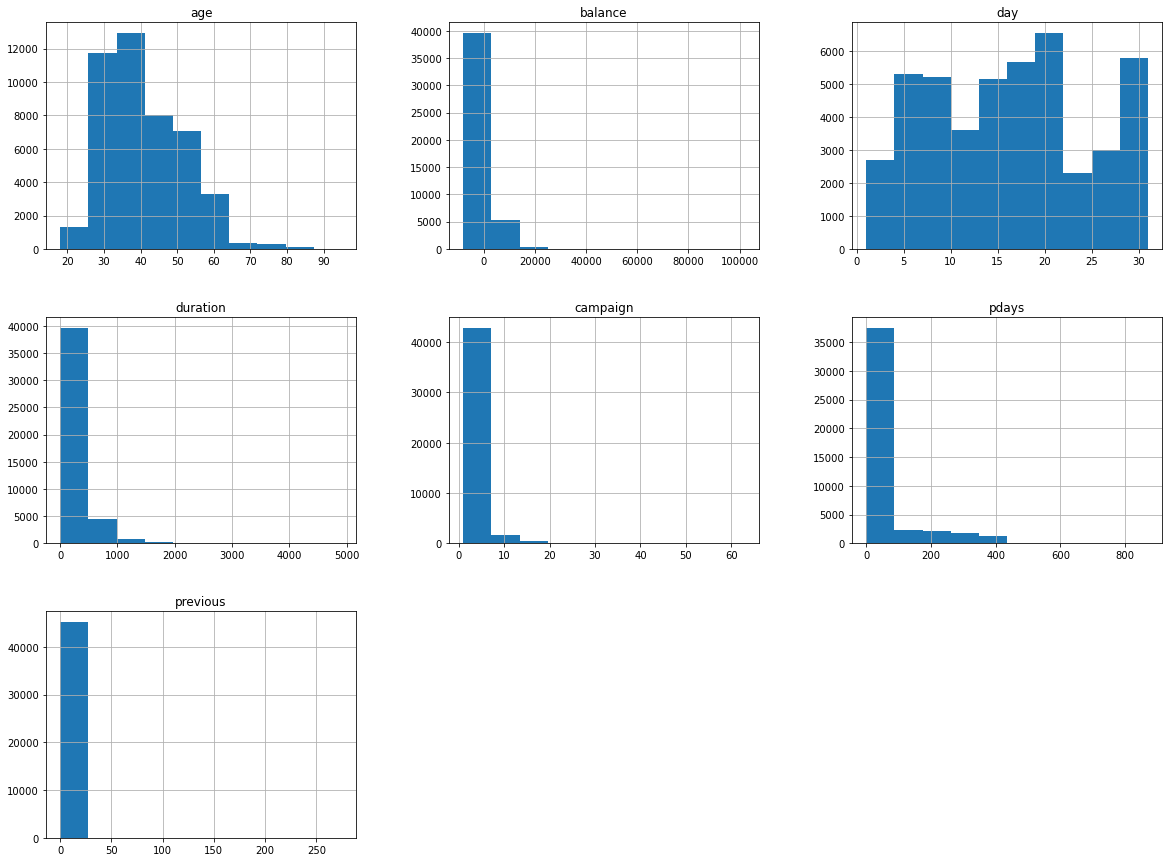

In [8]:
bank.hist(figsize = (20,15))
plt.show()

The following columns are tail heavy - 'age', 'balance', 'duration', 'campaign' and 'pdays'. They extend much farther to the right of the median.

If we look at the 'age' column , most of the data is collected from the age group 28 to 50 yrs.

We have some extreme values for 'balance', 'duration' and 'pdays'.

#### Correlation matrix for numerical variables

<AxesSubplot:>

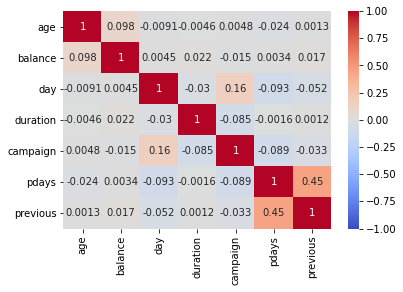

In [9]:
sns.heatmap(bank.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'coolwarm')

'pdays' and 'previous' have positive correlation of 0.45

### Relationship between numerical variables and the target variable

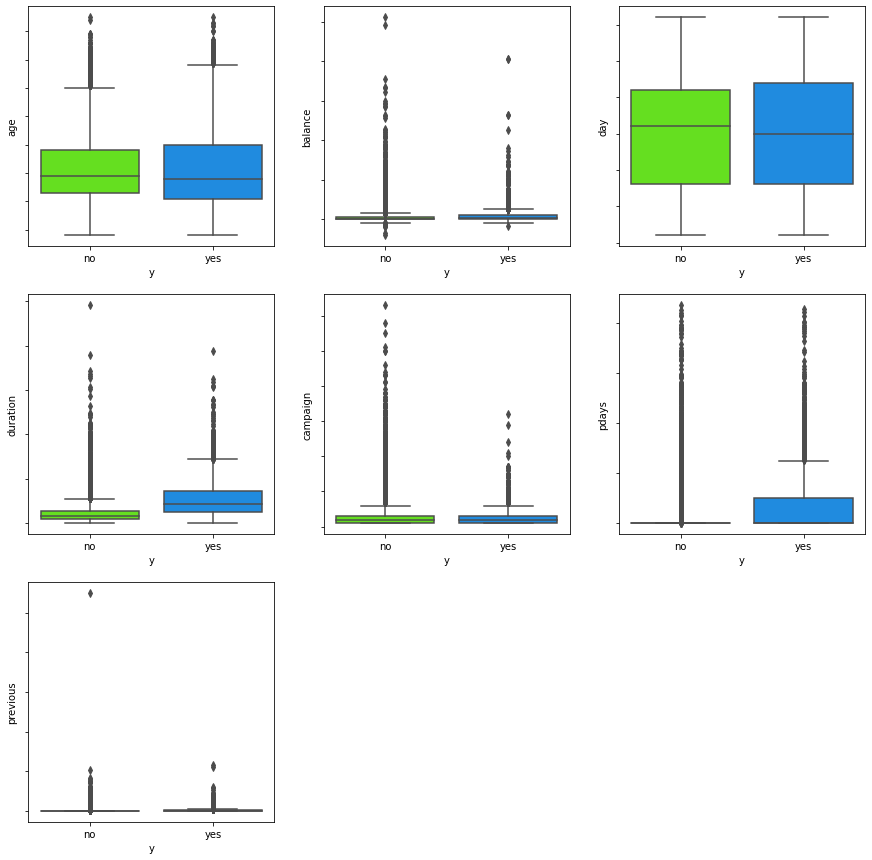

In [10]:
plt.subplots(3,3, figsize = (15,15))
for idx, column in enumerate(bank.select_dtypes(include = 'number').columns):
    ax = plt.subplot(3,3,idx+1)
    ax.yaxis.set_ticklabels([])    
    sns.boxplot(data = bank, x = 'y', y = column, palette="gist_rainbow")

plt.subplot(3,3,8).set_visible(False)
plt.subplot(3,3,9).set_visible(False)

Observation: 

The median value of 'duration' is high for the clients who have subscribed. The 'duration' column is skewed to the right for both- the clients who have subscribed and who have not subscribed, indicating that the column has outliers.

The median value of 'day' column for the clients who have subscribed is little lower than for the clients who have not.

The dispersion for the column 'pdays' is greater for the clients who have subscribed, this suggests that the clients who have been contacted in previous campaigns have subscribed. The median value of 'pdays' column for the clients who have not subscribed is -1 which suggests that clients who have not been previously contacted have the tendency to not subscribe.
The 'pday' column is skewed to the right for both- the clients who have subscribed and who have not subscribed, indicating that the column has outliers.



### Analysis of Categorical Variables

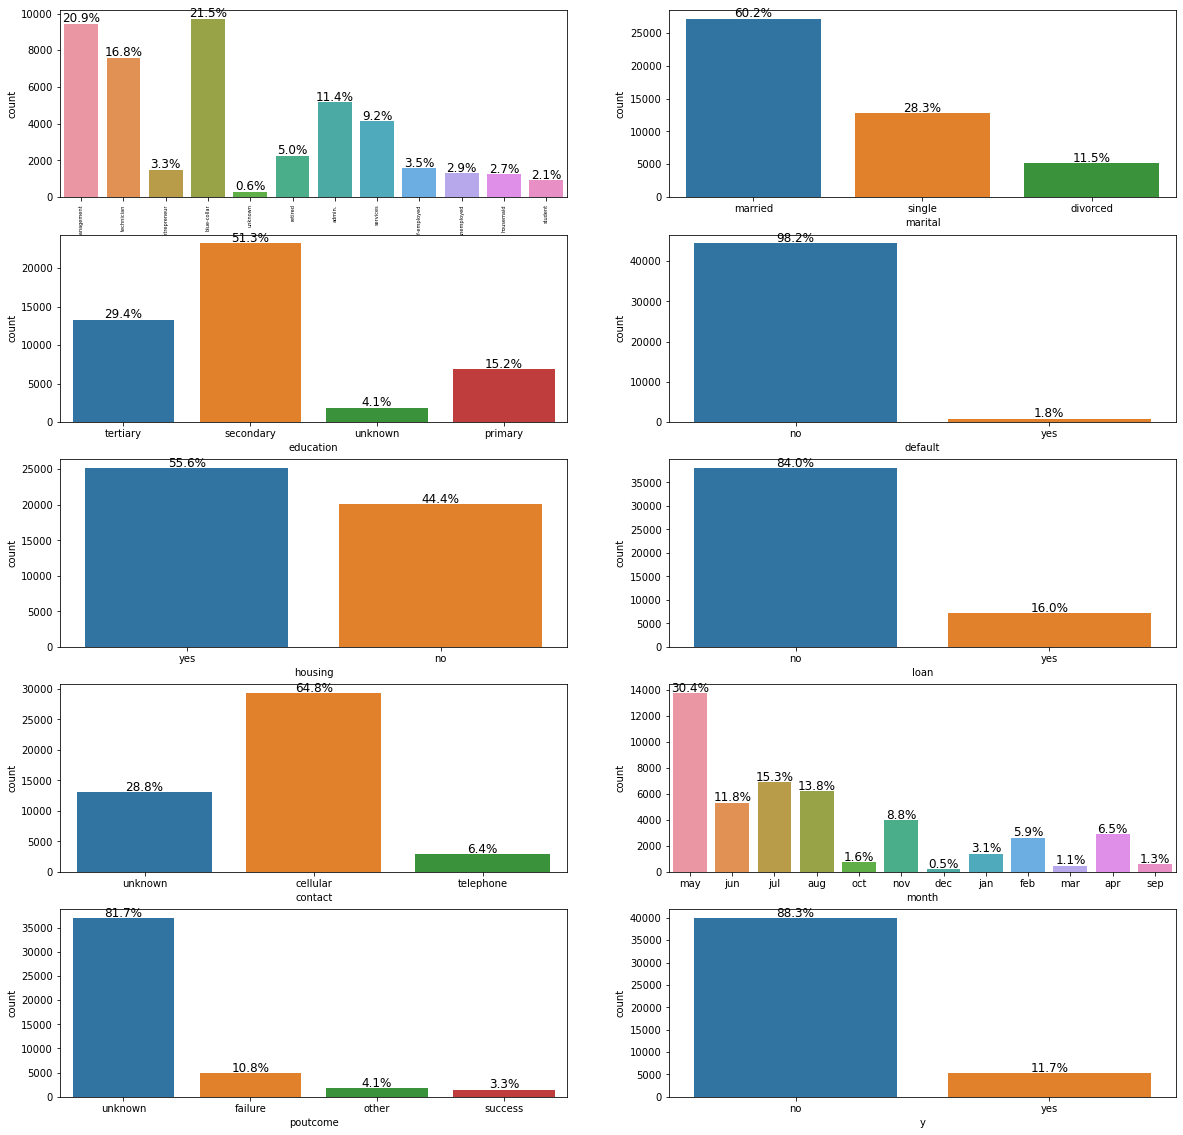

In [11]:
fig = plt.figure(figsize = (20,20))

for idx, cols in enumerate(bank.select_dtypes(include = 'object').columns):
    ax = fig.add_subplot(5,2,idx+1)
    
    if idx ==0:    
       plt.xticks(rotation = 90,fontsize = 5)
    sns.countplot(data = bank, x = cols, ax = ax)
    for p in ax.patches:
        label = "{:.1f}%".format(
                100 * p.get_height() / len(bank[cols])
            )  # percentag
        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            
            textcoords="offset points",
        )  # annotate the percentage
    
plt.show()


Observation:

21.5% of clients have 'blue collar' job followed by clients who have 'management' and 'technician' jobs with the ratio 20.9% and 16.8% respectively.

60.2% of the clients are married.

51.5% of the clients have 'secondary' education followed by 29.4% with the tertiary education.

There are very less clients who have defaulted on the credit (1.8%). 98.2% of the clients have no default.

55.6% of the clients have taken housing loan and 16% of the clients have taken personal loan.

Most of the clients, 64.8%, have cellular communication type.

Most of the clients,30.4%, were last contacted in 'May' month followed by 'July' month.

Most of the outcome from previous campaign is unknown,81.7% .

The dataset is highly unbalanced. We have 88.3% of the clients who have not subscribed and only 11.7% of them who have subscribed. We can make the dataset balanced using SMOTE.




### Analysis Of Categorical Variables w.r.t Target Variable

In [12]:
def target_count(df, col1, col2):
    fig = plt.figure(figsize = (15, 7.2))
    ax = fig.add_subplot(121)
    sns.countplot(x = col1, data = df, palette = ['tab:blue', 'tab:cyan'], ax = ax, orient = 'v',
                  hue = 'y').set_title(col1.capitalize() +' count plot by Target', 
                                                                      fontsize = 13)
    plt.legend(labels = ['Not Subscribed', 'Subscribed'])
    plt.xticks(rotation = 90)
    
    ax = fig.add_subplot(122)
    sns.countplot(x = col2, data = df, palette = ['tab:blue', 'tab:cyan'], ax = ax, orient = 'v', 
                  hue = 'y').set_title(col2.capitalize() +' coount plot by Target', 
                                                                      fontsize = 13)
    plt.legend(labels = ['Not Subscribed', 'Subscribed'])
    plt.xticks(rotation = 90)
    
    
    return plt.show()

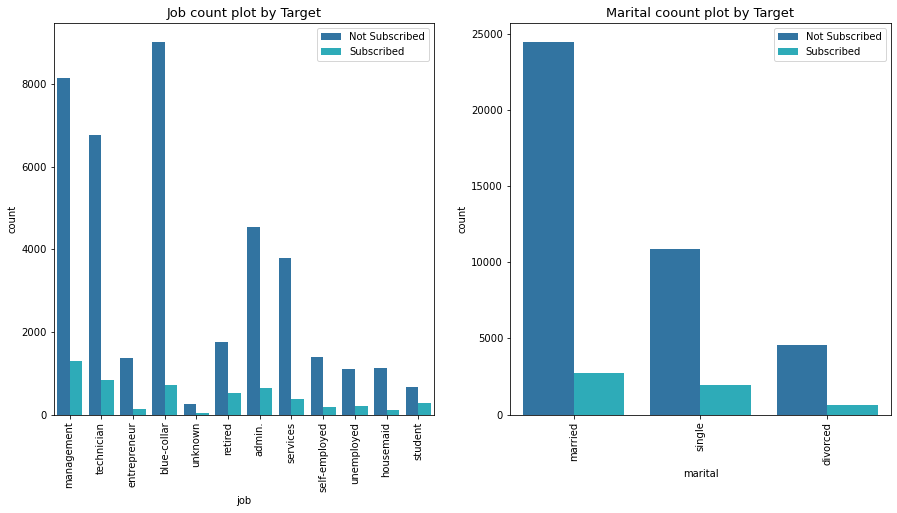

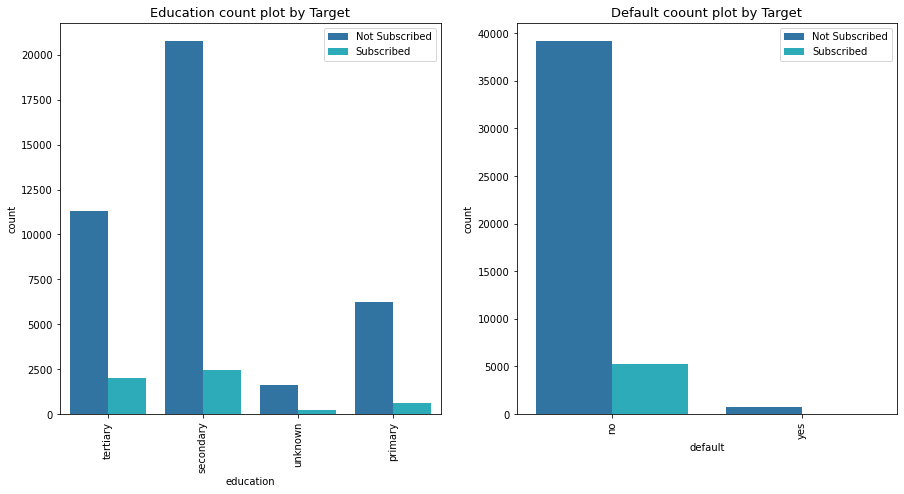

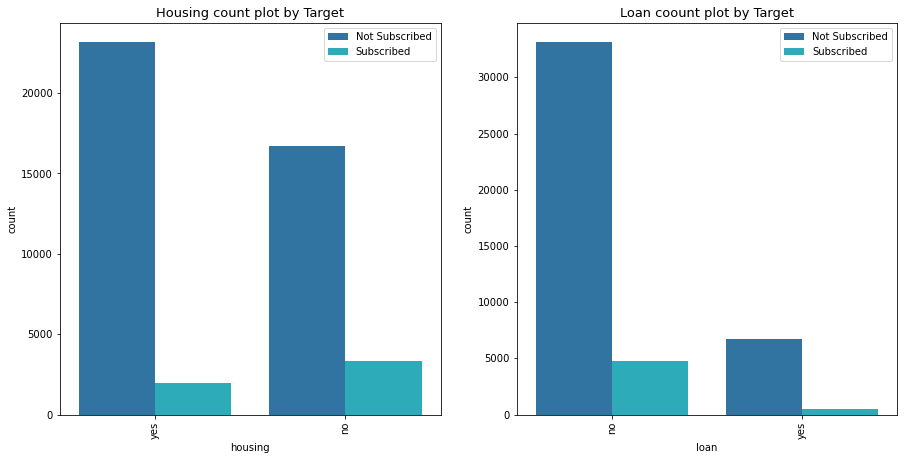

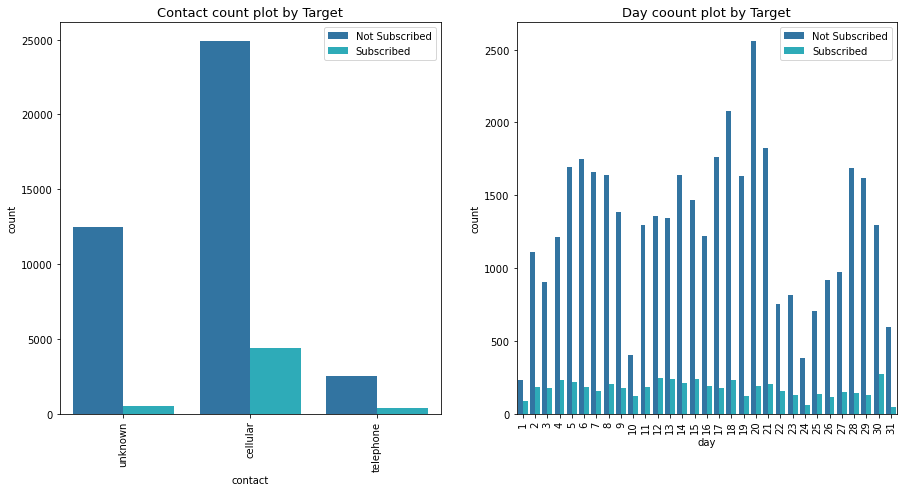

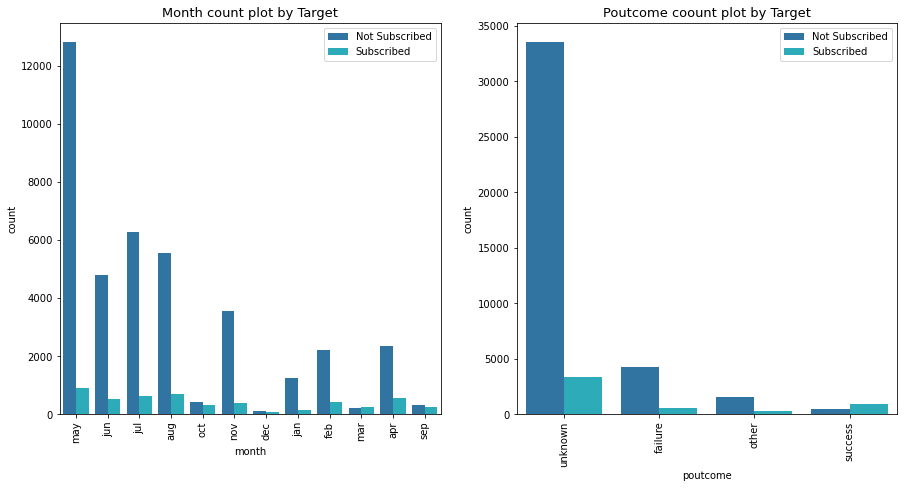

In [13]:
# Subscribe and didn't subscribe for categorical columns
target_count(bank, 'job', 'marital')
target_count(bank, 'education', 'default')
target_count(bank, 'housing', 'loan')
target_count(bank, 'contact', 'day')
target_count(bank, 'month', 'poutcome')



Observations:


Management have a subscription rate of ~25 percent followed by technician.
    
Married and single clients are more likely to subscribe then divorced clients

Clients with education of secondary followed by tertiary are more likely to subscribe to term deposits

Most of the clients don't have credit in default and their subscription rate is higher then people with default

Cellular communication type have higher subscription rate

Clients who do not have housing or personal loan have higher subscription rate

Most of the subscription were made in May and August


### Distribution plot of  numerical variable with the outliers and without the outliers

In our histogram plot we saw that following columns are tail heavy - 'age', 'balance', 'duration', 'campaign' and 'pdays'. They extend much farther to the right of the median. 

In [14]:
def odp_plots(df, col):
    f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 7.2))
    
    # Boxplot to check outliers
    sns.boxplot(data = df, x = col, ax = ax1,color = 'darkslategrey')
    
    # Distribution plot with outliers
    sns.histplot(df[col], color = 'teal', ax = ax2,
                 kde = True)
    ax2.set_title(f'Distribution Plot of {col} with outliers')
    
    #Removing outliers
    upper, lower = np.percentile(df[col], [1,99])
    y = pd.DataFrame(np.clip(df[col], upper, lower))
    
    # Distribution plot without outliers
    sns.histplot(y[col], ax = ax3, color = 'tab:orange', 
                 kde = True )
    ax3.set_title(f'Distribution Plot of {col} without outliers')
    
    ax1.set_title(col + ' Boxplot Analysis', fontsize = 15)
    
    return plt.show()

Age column ----------------------------------------------------------------------------------------------------


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
29158,83,retired,married,primary,no,425,no,no,telephone,2,feb,912,1,-1,0,unknown,no
29261,75,retired,divorced,primary,no,46,no,no,cellular,2,feb,294,1,-1,0,unknown,no
29263,75,retired,married,primary,no,3324,no,no,cellular,2,feb,149,1,-1,0,unknown,no
29322,83,retired,married,tertiary,no,6236,no,no,cellular,2,feb,283,2,-1,0,unknown,no
29865,75,retired,divorced,primary,no,3881,yes,no,cellular,4,feb,136,3,-1,0,unknown,yes


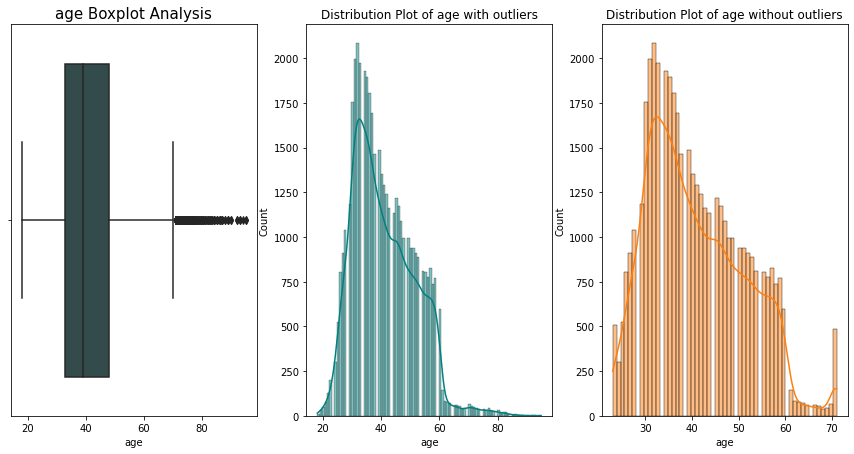

In [15]:
#Identify outliers for age column
Q1 = bank['age'].quantile(0.25)
Q3 = bank['age'].quantile(0.75)
IQR = Q3 - Q1

print('Age column', '--'*50)
# Display first 10 rows for the columns with outliers
display(bank.loc[(bank['age'] < (Q1 - 1.5 * IQR))| (bank['age'] > (Q3 + 1.5 * IQR))].head())

#Distribution plot with and withpout outliers
odp_plots(bank, 'age')


Balance column ----------------------------------------------------------------------------------------------------


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
34,51,management,married,tertiary,no,10635,yes,no,unknown,5,may,336,1,-1,0,unknown,no
65,51,management,married,tertiary,no,6530,yes,no,unknown,5,may,91,1,-1,0,unknown,no
69,35,blue-collar,single,secondary,no,12223,yes,yes,unknown,5,may,177,1,-1,0,unknown,no
70,57,blue-collar,married,secondary,no,5935,yes,yes,unknown,5,may,258,1,-1,0,unknown,no
186,40,services,divorced,unknown,no,4384,yes,no,unknown,5,may,315,1,-1,0,unknown,no


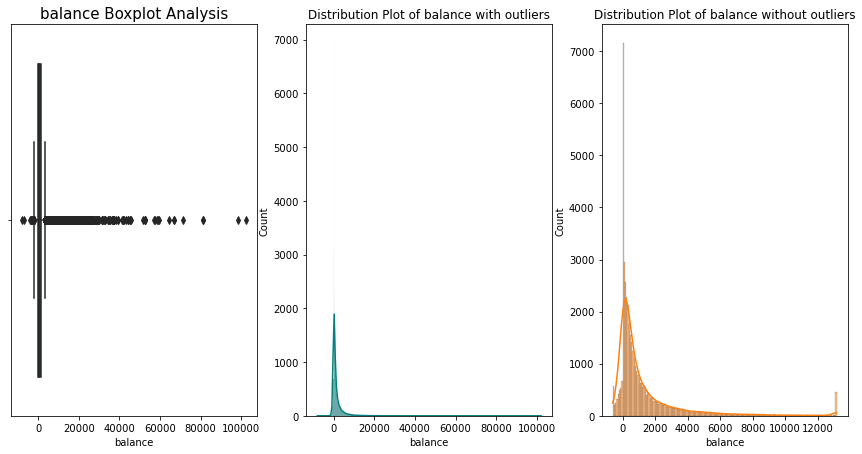

In [16]:
#Identify outliers for the balance column
Q1 = bank['balance'].quantile(0.25)
Q3 = bank['balance'].quantile(0.75)
IQR = Q3 - Q1

print('Balance column', '--'*50)
# Display first 10 rows for the columns with outliers
display(bank.loc[(bank['balance'] < (Q1 - 1.5 * IQR))| (bank['balance'] > (Q3 + 1.5 * IQR))].head())

#Distribution plot with and withpout outliers
odp_plots(bank, 'balance')


Duration column ------------------------------------------------------------------------------------------------------------


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,unknown,no
43,54,retired,married,secondary,no,529,yes,no,unknown,5,may,1492,1,-1,0,unknown,no
53,42,admin.,single,secondary,no,-76,yes,no,unknown,5,may,787,1,-1,0,unknown,no
59,46,services,married,primary,no,179,yes,no,unknown,5,may,1778,1,-1,0,unknown,no
61,53,technician,divorced,secondary,no,989,yes,no,unknown,5,may,812,1,-1,0,unknown,no


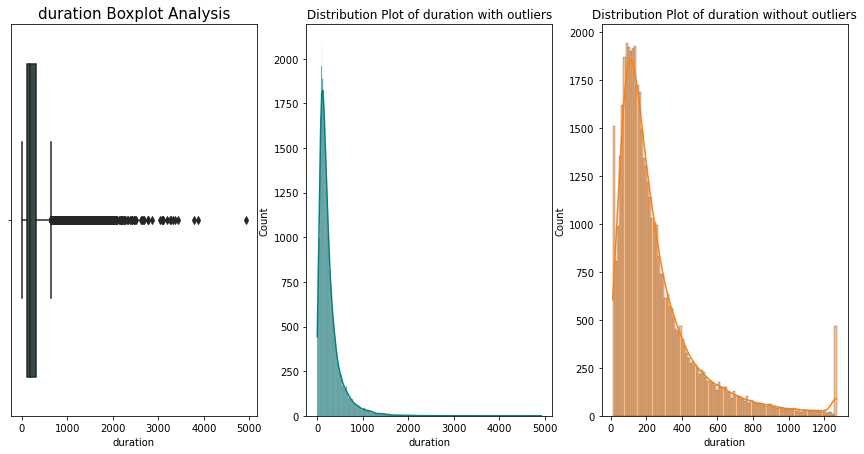

In [17]:
# Outlier, distribution for 'duration' column
Q3 = bank['duration'].quantile(0.75)
Q1 = bank['duration'].quantile(0.25)
IQR = Q3 - Q1

print('Duration column', '--'*54)
display(bank.loc[(bank['duration'] < (Q1 - 1.5 * IQR)) | (bank['duration'] > (Q3 + 1.5 * IQR))].head())

odp_plots(bank, 'duration')

Campaign column ------------------------------------------------------------------------------------------------------------


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
758,59,services,married,secondary,no,307,yes,yes,unknown,6,may,250,7,-1,0,unknown,no
780,30,admin.,married,secondary,no,4,no,no,unknown,7,may,172,8,-1,0,unknown,no
906,27,services,single,secondary,no,0,yes,no,unknown,7,may,388,7,-1,0,unknown,no
1103,52,technician,married,unknown,no,133,yes,no,unknown,7,may,253,8,-1,0,unknown,no
1105,43,admin.,married,tertiary,no,1924,yes,no,unknown,7,may,244,7,-1,0,unknown,no


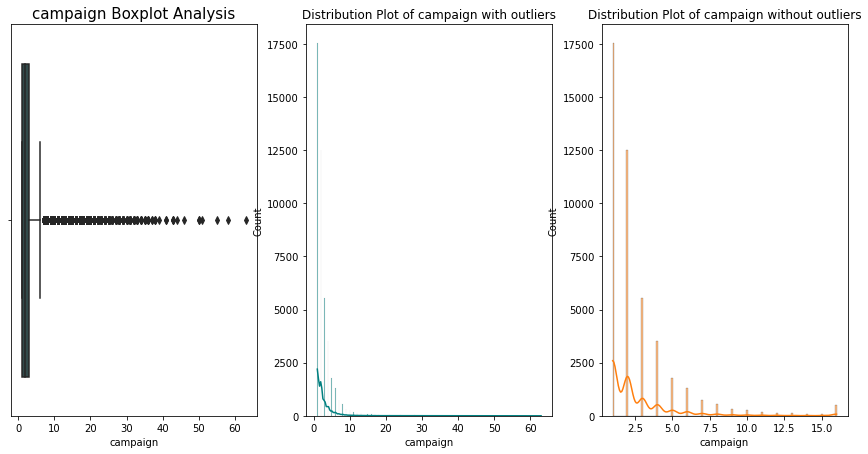

In [18]:
# Outlier, distribution for 'campaign' column
Q3 = bank['campaign'].quantile(0.75)
Q1 = bank['campaign'].quantile(0.25)
IQR = Q3 - Q1

print('Campaign column', '--'*54)
display(bank.loc[(bank['campaign'] < (Q1 - 1.5 * IQR)) | (bank['campaign'] > (Q3 + 1.5 * IQR))].head())

odp_plots(bank, 'campaign')



Previous column ------------------------------------------------------------------------------------------------------------


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes


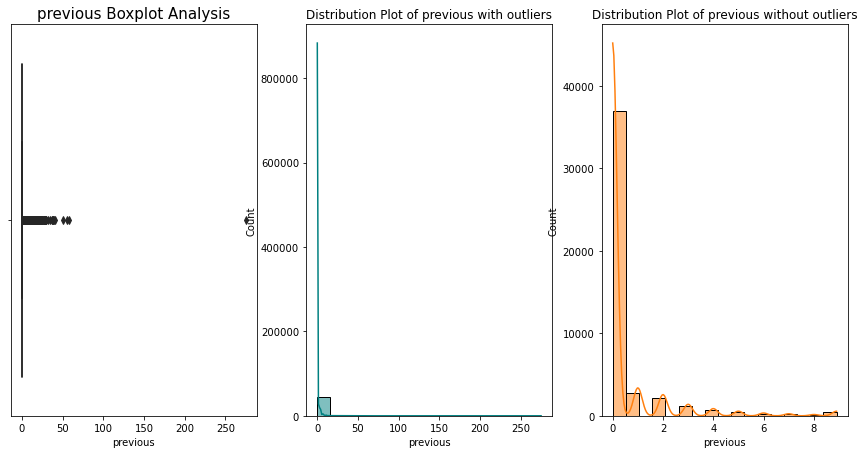

In [19]:
# Outlier, distribution and probability plot for 'previous' column
Q3 = bank['previous'].quantile(0.75)
Q1 = bank['previous'].quantile(0.25)
IQR = Q3 - Q1

print('Previous column', '--'*54)
display(bank.loc[(bank['previous'] < (Q1 - 1.5 * IQR)) | (bank['previous'] > (Q3 + 1.5 * IQR))].head())

odp_plots(bank, 'previous')


Previous column ------------------------------------------------------------------------------------------------------------


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes


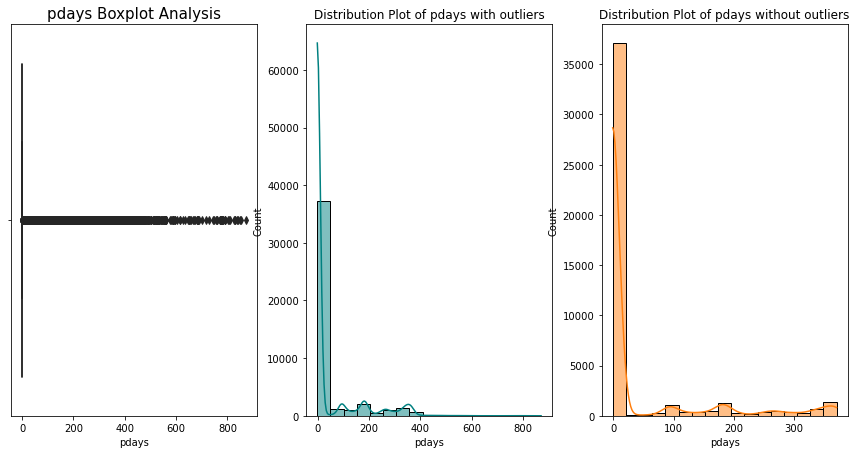

In [20]:
# Outlier, distribution and probability plot for 'previous' column
Q3 = bank['pdays'].quantile(0.75)
Q1 = bank['pdays'].quantile(0.25)
IQR = Q3 - Q1

print('Previous column', '--'*54)
display(bank.loc[(bank['pdays'] < (Q1 - 1.5 * IQR)) | (bank['pdays'] > (Q3 + 1.5 * IQR))].head())

odp_plots(bank, 'pdays')

### Feature Engineering

In [21]:
print('Categorical Columns: \n{}'.format(list(bank.select_dtypes(include = 'object').columns)))
print('Numerical Columns: \n{}'.format(list(bank.select_dtypes(exclude = 'object').columns)))

Categorical Columns: 
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
Numerical Columns: 
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [22]:
for col in bank.select_dtypes(include = 'object').columns:
    bank[col] = bank[col].astype('category')

In [23]:
col_transform = bank.select_dtypes(include = 'category').columns
col_transform

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [24]:
bank = pd.get_dummies(bank, columns = col_transform, drop_first = True)

In [25]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   job_blue-collar      45211 non-null  uint8
 8   job_entrepreneur     45211 non-null  uint8
 9   job_housemaid        45211 non-null  uint8
 10  job_management       45211 non-null  uint8
 11  job_retired          45211 non-null  uint8
 12  job_self-employed    45211 non-null  uint8
 13  job_services         45211 non-null  uint8
 14  job_student          45211 non-null  uint8
 15  job_technician       45211 non-null  uint8
 16  job_unemployed       4

#### Correlation between Target Variable and other variables



In [26]:
corr_abs = []
allVars = bank.drop('y_yes', axis = 1).columns

for var in allVars:
    corr_abs.append(round(abs(bank['y_yes'].corr(bank[var])),3))

In [27]:
display(pd.DataFrame([allVars, corr_abs],
                     index = ['Variables','Correlation']).T.sort_values('Correlation', ascending = False))

,Variables,Correlation
3,duration,0.395
40,poutcome_success,0.307
41,poutcome_unknown,0.167
27,contact_unknown,0.151
24,housing_yes,0.139
34,month_mar,0.129
37,month_oct,0.129
38,month_sep,0.123
5,pdays,0.104
35,month_may,0.102


duration,  poutcome_success,poutcome_unknown are top three variables that have relatively stronger correlation with the 'y_yes' variable

### Modeling

We will split the data into training, validation and test set.

We will apply the following classification models on our training set - Logistic Regression, SVM classification, Decision Tree, Random Forest.

Measure the performance of models on the validation set

Train and make predictions using Ensemble Model

### SMOTE technique 

As seen in the EDA our dataset is highly imbalanced with 88.3% of the data belonging to the clients who have not subscribed.We will use SMOTE technique to make our dataset balanced



In [28]:
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek

In [29]:
X = bank.drop('y_yes', axis = 1)
y = bank['y_yes']

In [30]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [31]:
sm = SMOTETomek(random_state = 42)

In [32]:
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [33]:
y_train_sm.value_counts()

0    27185
1    27185
Name: y_yes, dtype: int64

We now have balanced dataset

In [34]:
# Importing metrics to measure model performance
from sklearn.metrics import (f1_score,
                            accuracy_score,
                            recall_score,
                            precision_score,                            
                            roc_auc_score,                            
                            precision_recall_curve,
                            roc_curve,)

In [35]:
from sklearn.metrics import confusion_matrix

We will split our training data into folds using StratifiedKFold. The StratifiedKFold class performs stratified sampling to produce folds that contains representative ratio of each class. In the function below , at each iteration the code trains the model on the training folds and makes predictions on test folds. Then it measures the performance for each fold.

In [36]:
from sklearn.model_selection import StratifiedKFold
n_splits = 5
def train_predict(model,X,y, name):
    acc_score = []
    rec_score = []
    prec_score = []
    F1_score = []
    ROC_AUC = []
    skf = StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 42)
    for i, (train_idx, test_idx) in enumerate(list(skf.split(X,y))):
        #Training set
        X_train_fold = X.iloc[train_idx]
        y_train_fold = y.iloc[train_idx]
        
        #Test Set
        X_test_fold = X.iloc[test_idx]
        y_test_fold = y.iloc[test_idx]
        
        # Fit the model
        model.fit(X_train_fold, y_train_fold)
        
        # Get the predictions
        y_pred = model.predict(X_test_fold)
        
        # Evaluate train and test scores
        train_ = model.score(X_train_fold,y_train_fold)
        test_ = model.score(X_test_fold, y_test_fold)
        
        # Measure the metrics
        accuracy_ = accuracy_score(y_test_fold, y_pred)
        recall_ = recall_score(y_test_fold, y_pred)
        precision_ = precision_score(y_test_fold, y_pred)
        f1_ = f1_score(y_test_fold, y_pred)
        roc_auc_ = roc_auc_score(y_test_fold, y_pred)
        
        #Display the scores for each fold
        print(f'Model - {name.capitalize()} and fold {i}')
        print('--'*20)
        print('Training Score: {0:.3f}'.format(train_))
        print('Test Score: {0:.3f}'.format(test_))
        print('Accuracy Score: {0:.3f}'.format(accuracy_))
        print('Recall Score: {0:.3f}'.format(recall_))
        print('Prescision Score: {0:.3f}'.format(precision_))
        print('F1 Score: {0:.3f}'.format(f1_))
        print('ROC AUC Score: {0:.3f}'.format(roc_auc_))
        
        # Append the scores
        acc_score.append(accuracy_)
        rec_score.append(recall_)
        prec_score.append(precision_)
        F1_score.append(f1_)
        ROC_AUC.append(roc_auc_)
    
    #Create the dataframe of scores
    df = pd.DataFrame({'Accuracy Score': np.mean(acc_score), 'Recall Score' : np.mean(rec_score), 
                       'Precision Score': np.mean(prec_score), 
                       'F1 Score': np.mean(F1_score),
                    'ROC AUC Score': np.mean(ROC_AUC)
                      },
                     index = [name])
    
    
    return df
    

In [37]:
# Define the function to build confusion matrix
from sklearn.model_selection import cross_val_predict

def model_cnf_mtrx(model,X_train,y_train):
    # Getting the predictions
    # Compare these predictions to the actual target
    y_pred = cross_val_predict(model, X_train , y_train, cv = 3)
    
    #Create the matrix
    cm = confusion_matrix(y_train, y_pred)
    
    # Define labels
    labels = np.asarray([ ["{0:0.0f}".format(item) + '\n{0:.2%}'.format(item/cm.flatten().sum())]
                         for item in cm.flatten()]).reshape(2,2)
    
    plt.figure(figsize = (6,4))
    sns.heatmap(cm, annot = labels, fmt = '')
    plt.ylabel("True Label")
    plt.xlabel('Predicted Label')
    

### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
df = pd.DataFrame()
log_clf = LogisticRegression()
df_log = train_predict(log_clf, X_train_sm,y_train_sm, 'Logistic Regression without Tuning')
df = df.append(df_log)
df

Model - Logistic regression without tuning and fold 0
----------------------------------------
Training Score: 0.890
Test Score: 0.893
Accuracy Score: 0.893
Recall Score: 0.884
Prescision Score: 0.901
F1 Score: 0.892
ROC AUC Score: 0.893
Model - Logistic regression without tuning and fold 1
----------------------------------------
Training Score: 0.822
Test Score: 0.823
Accuracy Score: 0.823
Recall Score: 0.791
Prescision Score: 0.845
F1 Score: 0.817
ROC AUC Score: 0.823
Model - Logistic regression without tuning and fold 2
----------------------------------------
Training Score: 0.837
Test Score: 0.832
Accuracy Score: 0.832
Recall Score: 0.851
Prescision Score: 0.820
F1 Score: 0.835
ROC AUC Score: 0.832
Model - Logistic regression without tuning and fold 3
----------------------------------------
Training Score: 0.897
Test Score: 0.896
Accuracy Score: 0.896
Recall Score: 0.894
Prescision Score: 0.898
F1 Score: 0.896
ROC AUC Score: 0.896
Model - Logistic regression without tuning and f

,Accuracy Score,Recall Score,Precision Score,F1 Score,ROC AUC Score
Logistic Regression without Tuning,0.866434,0.860438,0.87112,0.865525,0.866434


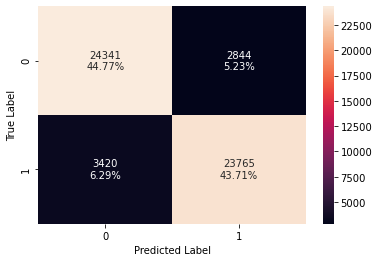

In [39]:
model_cnf_mtrx(log_clf,X_train_sm, y_train_sm)

In [40]:
###Logistic Regression with Hypertuning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
LR = LogisticRegression(n_jobs = -1, random_state = 42)
params = {"C":[0.0001, 0.001, 0.01, 1 ,10,100], 'penalty':['l1', 'l2'], 'max_iter':[100,110,120,130,140]}
scoring = {'Recall': make_scorer(recall_score), 'f1_score': make_scorer(f1_score)}

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
log_clf_tuned = GridSearchCV(LR, param_grid = params, scoring = scoring, n_jobs = -1, refit = 'f1_score')

log_clf_tuned.fit(X_train_sm, y_train_sm)
print(log_clf_tuned.best_estimator_)
print(log_clf_tuned.best_params_)



LogisticRegression(C=0.01, max_iter=140, n_jobs=-1, random_state=42)
{'C': 0.01, 'max_iter': 140, 'penalty': 'l2'}


In [41]:
LR_Hyper = LogisticRegression(C = 0.01, penalty = 'l2', max_iter = 140, n_jobs = -1, random_state = 42)
df_log_hyper = train_predict(LR_Hyper, X_train_sm, y_train_sm, 'Logistic Regression with Hypertuning')
df = df.append(df_log_hyper)
df

Model - Logistic regression with hypertuning and fold 0
----------------------------------------
Training Score: 0.895
Test Score: 0.897
Accuracy Score: 0.897
Recall Score: 0.885
Prescision Score: 0.907
F1 Score: 0.896
ROC AUC Score: 0.897
Model - Logistic regression with hypertuning and fold 1
----------------------------------------
Training Score: 0.895
Test Score: 0.894
Accuracy Score: 0.894
Recall Score: 0.891
Prescision Score: 0.896
F1 Score: 0.893
ROC AUC Score: 0.894
Model - Logistic regression with hypertuning and fold 2
----------------------------------------
Training Score: 0.890
Test Score: 0.891
Accuracy Score: 0.891
Recall Score: 0.883
Prescision Score: 0.897
F1 Score: 0.890
ROC AUC Score: 0.891
Model - Logistic regression with hypertuning and fold 3
----------------------------------------
Training Score: 0.905
Test Score: 0.901
Accuracy Score: 0.901
Recall Score: 0.888
Prescision Score: 0.912
F1 Score: 0.900
ROC AUC Score: 0.901
Model - Logistic regression with hypertu

,Accuracy Score,Recall Score,Precision Score,F1 Score,ROC AUC Score
Logistic Regression without Tuning,0.866434,0.860438,0.871120,0.865525,0.866434
Logistic Regression with Hypertuning,0.894427,0.886555,0.900792,0.893601,0.894427


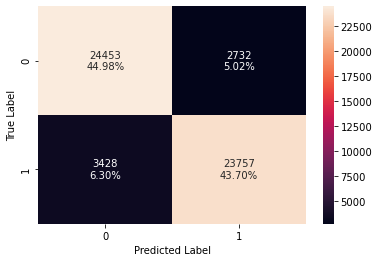

In [42]:
model_cnf_mtrx(LR_Hyper,X_train_sm, y_train_sm)

### KNN - K Nearest Neighbors Classification

The idea behind K-Nearest Neighbors (KNN) is very simple.1 For each record to be classified:

Find K records that have similar features (i.e., similar predictor values) where K is the number of neighbors considered.

For classification, find out what the majority class is among those similar records and assign that class to the new record.

In KNN similarity is measured using distance metrics which measures how far two records are from another. The two popular distance metrics are Euclidean Distance( straight-line distance between two points) and Manhattan Distance(distance between two points traversed in a single direction at a time)


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_sm_scaled = pd.DataFrame(scaler.fit_transform(X_train_sm), columns = X_train_sm.columns, index = X_train_sm.index)

knn_clf = KNeighborsClassifier()

df_knn = train_predict(knn_clf,X_train_sm_scaled, y_train_sm, 'KNN without tuning')

df = df.append(df_knn)
df

Model - Knn without tuning and fold 0
----------------------------------------
Training Score: 0.945
Test Score: 0.929
Accuracy Score: 0.929
Recall Score: 0.908
Prescision Score: 0.947
F1 Score: 0.927
ROC AUC Score: 0.929
Model - Knn without tuning and fold 1
----------------------------------------
Training Score: 0.944
Test Score: 0.926
Accuracy Score: 0.926
Recall Score: 0.907
Prescision Score: 0.943
F1 Score: 0.925
ROC AUC Score: 0.926
Model - Knn without tuning and fold 2
----------------------------------------
Training Score: 0.944
Test Score: 0.929
Accuracy Score: 0.929
Recall Score: 0.912
Prescision Score: 0.944
F1 Score: 0.928
ROC AUC Score: 0.929
Model - Knn without tuning and fold 3
----------------------------------------
Training Score: 0.944
Test Score: 0.929
Accuracy Score: 0.929
Recall Score: 0.911
Prescision Score: 0.945
F1 Score: 0.928
ROC AUC Score: 0.929
Model - Knn without tuning and fold 4
----------------------------------------
Training Score: 0.945
Test Score:

,Accuracy Score,Recall Score,Precision Score,F1 Score,ROC AUC Score
Logistic Regression without Tuning,0.866434,0.860438,0.871120,0.865525,0.866434
Logistic Regression with Hypertuning,0.894427,0.886555,0.900792,0.893601,0.894427
KNN without tuning,0.927957,0.909472,0.944387,0.926599,0.927957


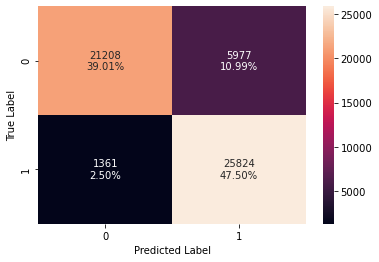

In [44]:
model_cnf_mtrx(knn_clf,X_train_sm, y_train_sm)

### Error Rate vs K (nearest neighbors) graph

This graph will help us decide which K value to choose in KNN classifier

In [45]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns, index = X_test.index)

uniform


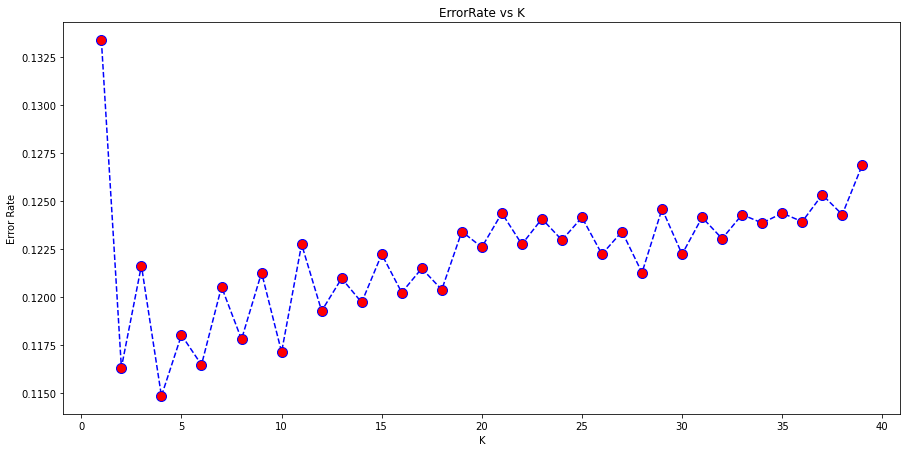

distance


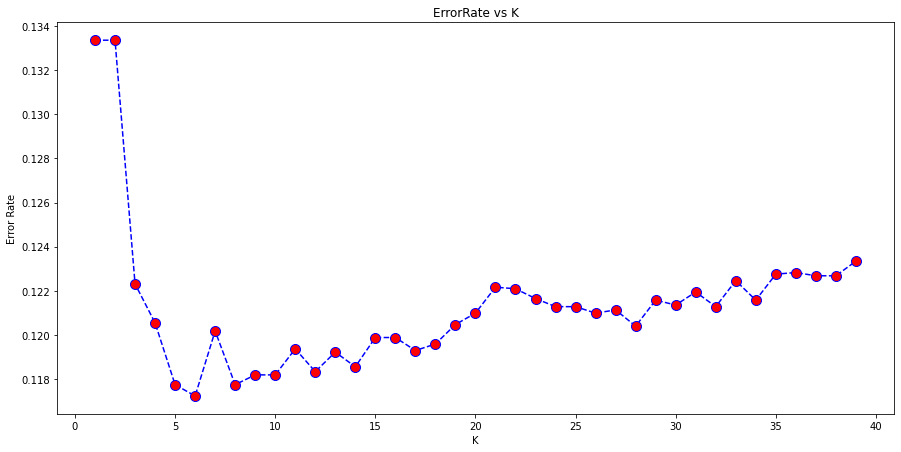

In [46]:

weights = ['uniform', 'distance']

for w in weights:
    print(w)
    rate = []
    for i in range(1,40):
        knn_clf = KNeighborsClassifier(n_neighbors = i, weights = w)
        knn_clf.fit(X_train_sm_scaled, y_train_sm)
        y_pred = knn_clf.predict(X_test_scaled)
        rate.append(np.mean(y_pred!= y_test))
    plt.figure(figsize= (15,7.2))
    plt.plot(range(1,40), rate, color ='blue', linestyle = 'dashed', marker = 'o',markerfacecolor = 'red', markersize = 10)
    plt.title('ErrorRate vs K')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()
        

In [47]:
KNN = KNeighborsClassifier(n_jobs = -1 )

params = {'n_neighbors': list(range(3,40,2)), 'weights': ['uniform', 'distance'], 
          'metric': ['minkowski', 'euclidean', 'manhattan']}
scoring = {'Recall': make_scorer(recall_score), 'f1_score': make_scorer(f1_score)}

skf = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)

KNN_hyper = GridSearchCV(KNN, param_grid = params, scoring = scoring, cv = skf, n_jobs = -1, refit = 'f1_score')
KNN_hyper.fit(X_train_sm_scaled, y_train_sm)
print(KNN_hyper.best_estimator_)
print(KNN_hyper.best_params_)

KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=9,
                     weights='distance')
{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


In [48]:
knn_hyper = KNeighborsClassifier(n_neighbors = 9, metric = 'manhattan', weights = 'distance')
df_knn = train_predict(knn_hyper, X_train_sm_scaled, y_train_sm, 'KNN with tuning')

df = df.append(df_knn)
df


Model - Knn with tuning and fold 0
----------------------------------------
Training Score: 1.000
Test Score: 0.931
Accuracy Score: 0.931
Recall Score: 0.912
Prescision Score: 0.949
F1 Score: 0.930
ROC AUC Score: 0.931
Model - Knn with tuning and fold 1
----------------------------------------
Training Score: 1.000
Test Score: 0.932
Accuracy Score: 0.932
Recall Score: 0.916
Prescision Score: 0.946
F1 Score: 0.931
ROC AUC Score: 0.932
Model - Knn with tuning and fold 2
----------------------------------------
Training Score: 1.000
Test Score: 0.937
Accuracy Score: 0.937
Recall Score: 0.919
Prescision Score: 0.952
F1 Score: 0.936
ROC AUC Score: 0.937
Model - Knn with tuning and fold 3
----------------------------------------
Training Score: 1.000
Test Score: 0.934
Accuracy Score: 0.934
Recall Score: 0.918
Prescision Score: 0.949
F1 Score: 0.933
ROC AUC Score: 0.934
Model - Knn with tuning and fold 4
----------------------------------------
Training Score: 1.000
Test Score: 0.934
Accuracy

,Accuracy Score,Recall Score,Precision Score,F1 Score,ROC AUC Score
Logistic Regression without Tuning,0.866434,0.860438,0.871120,0.865525,0.866434
Logistic Regression with Hypertuning,0.894427,0.886555,0.900792,0.893601,0.894427
KNN without tuning,0.927957,0.909472,0.944387,0.926599,0.927957
KNN with tuning,0.933585,0.916461,0.948962,0.932427,0.933585


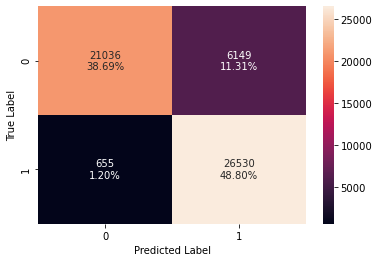

In [49]:
model_cnf_mtrx(knn_hyper,X_train_sm, y_train_sm)

### Naive Bayes 

In [50]:
from sklearn.naive_bayes import GaussianNB
naive_clf = GaussianNB()
df_naive = train_predict(naive_clf, X_train_sm, y_train_sm, 'Naive Bayes without tuning')
df = df.append(df_naive)
df

Model - Naive bayes without tuning and fold 0
----------------------------------------
Training Score: 0.887
Test Score: 0.887
Accuracy Score: 0.887
Recall Score: 0.898
Prescision Score: 0.878
F1 Score: 0.888
ROC AUC Score: 0.887
Model - Naive bayes without tuning and fold 1
----------------------------------------
Training Score: 0.884
Test Score: 0.886
Accuracy Score: 0.886
Recall Score: 0.898
Prescision Score: 0.877
F1 Score: 0.887
ROC AUC Score: 0.886
Model - Naive bayes without tuning and fold 2
----------------------------------------
Training Score: 0.886
Test Score: 0.887
Accuracy Score: 0.887
Recall Score: 0.898
Prescision Score: 0.880
F1 Score: 0.888
ROC AUC Score: 0.887
Model - Naive bayes without tuning and fold 3
----------------------------------------
Training Score: 0.886
Test Score: 0.884
Accuracy Score: 0.884
Recall Score: 0.899
Prescision Score: 0.873
F1 Score: 0.886
ROC AUC Score: 0.884
Model - Naive bayes without tuning and fold 4
----------------------------------

,Accuracy Score,Recall Score,Precision Score,F1 Score,ROC AUC Score
Logistic Regression without Tuning,0.866434,0.860438,0.871120,0.865525,0.866434
Logistic Regression with Hypertuning,0.894427,0.886555,0.900792,0.893601,0.894427
KNN without tuning,0.927957,0.909472,0.944387,0.926599,0.927957
KNN with tuning,0.933585,0.916461,0.948962,0.932427,0.933585
Naive Bayes without tuning,0.886390,0.898473,0.877278,0.887747,0.886390


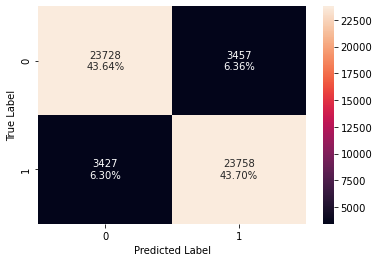

In [51]:
model_cnf_mtrx(naive_clf,X_train_sm, y_train_sm)

### Voting Classifier


In [52]:
from sklearn.ensemble import VotingClassifier

vtng_clf = VotingClassifier(estimators = [('lr',LogisticRegression()),
                                        ('knn', KNeighborsClassifier()),
                                        ('naive', GaussianNB())], voting = 'soft')

df_vtng = train_predict(vtng_clf, X_train_sm, y_train_sm, 'Voting Classifier')

df = df.append(df_vtng)

df


Model - Voting classifier and fold 0
----------------------------------------
Training Score: 0.943
Test Score: 0.934
Accuracy Score: 0.934
Recall Score: 0.949
Prescision Score: 0.922
F1 Score: 0.935
ROC AUC Score: 0.934
Model - Voting classifier and fold 1
----------------------------------------
Training Score: 0.939
Test Score: 0.928
Accuracy Score: 0.928
Recall Score: 0.955
Prescision Score: 0.906
F1 Score: 0.930
ROC AUC Score: 0.928
Model - Voting classifier and fold 2
----------------------------------------
Training Score: 0.940
Test Score: 0.927
Accuracy Score: 0.927
Recall Score: 0.956
Prescision Score: 0.903
F1 Score: 0.929
ROC AUC Score: 0.927
Model - Voting classifier and fold 3
----------------------------------------
Training Score: 0.944
Test Score: 0.933
Accuracy Score: 0.933
Recall Score: 0.949
Prescision Score: 0.919
F1 Score: 0.934
ROC AUC Score: 0.933
Model - Voting classifier and fold 4
----------------------------------------
Training Score: 0.944
Test Score: 0.93

,Accuracy Score,Recall Score,Precision Score,F1 Score,ROC AUC Score
Logistic Regression without Tuning,0.866434,0.860438,0.871120,0.865525,0.866434
Logistic Regression with Hypertuning,0.894427,0.886555,0.900792,0.893601,0.894427
KNN without tuning,0.927957,0.909472,0.944387,0.926599,0.927957
KNN with tuning,0.933585,0.916461,0.948962,0.932427,0.933585
Naive Bayes without tuning,0.886390,0.898473,0.877278,0.887747,0.886390
Voting Classifier,0.930899,0.951591,0.913868,0.932315,0.930899


In [53]:
vtng_clf = VotingClassifier(estimators = [('lr',LogisticRegression(C = 0.01, penalty = 'l2', max_iter = 140, n_jobs = -1, random_state = 42)),
              ('knn', KNeighborsClassifier(n_neighbors = 9, metric = 'manhattan', weights = 'distance')),
              ('naive', GaussianNB())], voting = 'soft')

df_vtng = train_predict(vtng_clf, X_train_sm, y_train_sm, 'Voting Classifier with tuned Classifiers')

df = df.append(df_vtng)

df
                                          

Model - Voting classifier with tuned classifiers and fold 0
----------------------------------------
Training Score: 0.965
Test Score: 0.934
Accuracy Score: 0.934
Recall Score: 0.950
Prescision Score: 0.920
F1 Score: 0.935
ROC AUC Score: 0.934
Model - Voting classifier with tuned classifiers and fold 1
----------------------------------------
Training Score: 0.966
Test Score: 0.934
Accuracy Score: 0.934
Recall Score: 0.952
Prescision Score: 0.919
F1 Score: 0.935
ROC AUC Score: 0.934
Model - Voting classifier with tuned classifiers and fold 2
----------------------------------------
Training Score: 0.966
Test Score: 0.934
Accuracy Score: 0.934
Recall Score: 0.955
Prescision Score: 0.917
F1 Score: 0.936
ROC AUC Score: 0.934
Model - Voting classifier with tuned classifiers and fold 3
----------------------------------------
Training Score: 0.962
Test Score: 0.934
Accuracy Score: 0.934
Recall Score: 0.946
Prescision Score: 0.923
F1 Score: 0.934
ROC AUC Score: 0.934
Model - Voting classifie

,Accuracy Score,Recall Score,Precision Score,F1 Score,ROC AUC Score
Logistic Regression without Tuning,0.866434,0.860438,0.871120,0.865525,0.866434
Logistic Regression with Hypertuning,0.894427,0.886555,0.900792,0.893601,0.894427
KNN without tuning,0.927957,0.909472,0.944387,0.926599,0.927957
KNN with tuning,0.933585,0.916461,0.948962,0.932427,0.933585
Naive Bayes without tuning,0.886390,0.898473,0.877278,0.887747,0.886390
Voting Classifier,0.930899,0.951591,0.913868,0.932315,0.930899
Voting Classifier with tuned Classifiers,0.933953,0.951223,0.919476,0.935073,0.933953


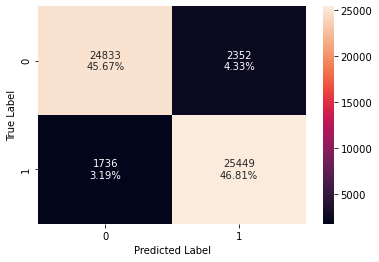

In [54]:
model_cnf_mtrx(vtng_clf,X_train_sm, y_train_sm)

### Ensemble Techniques

Decision Tree Classifier, Bagging Classifier, AdaBoost Classifier, Gradient Boosting Classifier and Random Forest Classifier.

### Decision Tree Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state = 42)
df_tree = train_predict(tree_clf, X_train_sm, y_train_sm, 'Decision Tree without tuning')

df = df.append(df_tree)
df

Model - Decision tree without tuning and fold 0
----------------------------------------
Training Score: 1.000
Test Score: 0.917
Accuracy Score: 0.917
Recall Score: 0.919
Prescision Score: 0.916
F1 Score: 0.918
ROC AUC Score: 0.917
Model - Decision tree without tuning and fold 1
----------------------------------------
Training Score: 1.000
Test Score: 0.915
Accuracy Score: 0.915
Recall Score: 0.923
Prescision Score: 0.909
F1 Score: 0.916
ROC AUC Score: 0.915
Model - Decision tree without tuning and fold 2
----------------------------------------
Training Score: 1.000
Test Score: 0.919
Accuracy Score: 0.919
Recall Score: 0.928
Prescision Score: 0.911
F1 Score: 0.920
ROC AUC Score: 0.919
Model - Decision tree without tuning and fold 3
----------------------------------------
Training Score: 1.000
Test Score: 0.917
Accuracy Score: 0.917
Recall Score: 0.926
Prescision Score: 0.910
F1 Score: 0.918
ROC AUC Score: 0.917
Model - Decision tree without tuning and fold 4
------------------------

,Accuracy Score,Recall Score,Precision Score,F1 Score,ROC AUC Score
Logistic Regression without Tuning,0.866434,0.860438,0.871120,0.865525,0.866434
Logistic Regression with Hypertuning,0.894427,0.886555,0.900792,0.893601,0.894427
KNN without tuning,0.927957,0.909472,0.944387,0.926599,0.927957
KNN with tuning,0.933585,0.916461,0.948962,0.932427,0.933585
Naive Bayes without tuning,0.886390,0.898473,0.877278,0.887747,0.886390
Voting Classifier,0.930899,0.951591,0.913868,0.932315,0.930899
Voting Classifier with tuned Classifiers,0.933953,0.951223,0.919476,0.935073,0.933953
Decision Tree without tuning,0.917050,0.924113,0.911256,0.917631,0.917050


In [56]:
path = tree_clf.cost_complexity_pruning_path(X_train_sm, y_train_sm)
ccp_alphas, impurities = path.ccp_alphas, path.impurities




In [57]:
tree_clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state = 42, ccp_alpha = ccp_alpha)
    clf.fit(X_train_sm, y_train_sm)
    tree_clfs.append(clf)
    

In [58]:
print('Number of nodes in the last tree is : {} with ccp_alpha : {}'.format(
           tree_clfs[-1].tree_.node_count, ccp_alphas[-1]))
    

Number of nodes in the last tree is : 1 with ccp_alpha : 0.10591659819268101


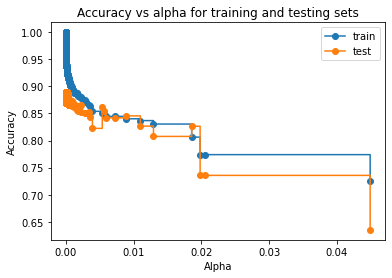

In [59]:
tree_clfs = tree_clfs[:-1]

train_score = [clfs.score(X_train_sm, y_train_sm) for clfs in tree_clfs]
test_score = [clfs.score(X_test, y_test) for clfs in tree_clfs]

ccp_alphas = ccp_alphas[:-1]
fig, ax = plt.subplots()
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.set_xlabel('Alpha')
ax.set_ylabel('Accuracy')
ax.plot(ccp_alphas, train_score, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_score, marker = 'o', label = 'test', drawstyle = 'steps-post')
ax.legend()
plt.show()

In [60]:
depth = [clfs.tree_.max_depth for clfs in tree_clfs]


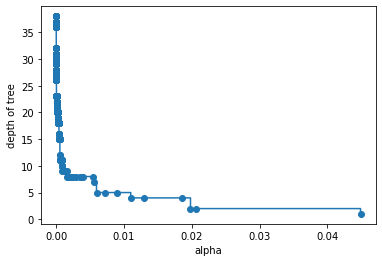

In [61]:
plt.plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
plt.xlabel("alpha")
plt.ylabel("depth of tree")
#plt.set_title("Depth vs alpha")
plt.show()

In [62]:
# Creating the model where we have tuned the maximum depth
index_best_model = np.argmax(test_score)
best_tree_model = tree_clfs[index_best_model]
print(best_tree_model)

DecisionTreeClassifier(ccp_alpha=8.691393229101336e-05, random_state=42)


In [63]:

df_tree = train_predict(best_tree_model, X_train_sm, y_train_sm, 'Decision Tree with tuning')

df = df.append(df_tree)
df

Model - Decision tree with tuning and fold 0
----------------------------------------
Training Score: 0.944
Test Score: 0.923
Accuracy Score: 0.923
Recall Score: 0.918
Prescision Score: 0.929
F1 Score: 0.923
ROC AUC Score: 0.923
Model - Decision tree with tuning and fold 1
----------------------------------------
Training Score: 0.945
Test Score: 0.924
Accuracy Score: 0.924
Recall Score: 0.931
Prescision Score: 0.918
F1 Score: 0.925
ROC AUC Score: 0.924
Model - Decision tree with tuning and fold 2
----------------------------------------
Training Score: 0.946
Test Score: 0.926
Accuracy Score: 0.926
Recall Score: 0.926
Prescision Score: 0.925
F1 Score: 0.926
ROC AUC Score: 0.926
Model - Decision tree with tuning and fold 3
----------------------------------------
Training Score: 0.948
Test Score: 0.922
Accuracy Score: 0.922
Recall Score: 0.930
Prescision Score: 0.916
F1 Score: 0.923
ROC AUC Score: 0.922
Model - Decision tree with tuning and fold 4
---------------------------------------

,Accuracy Score,Recall Score,Precision Score,F1 Score,ROC AUC Score
Logistic Regression without Tuning,0.866434,0.860438,0.871120,0.865525,0.866434
Logistic Regression with Hypertuning,0.894427,0.886555,0.900792,0.893601,0.894427
KNN without tuning,0.927957,0.909472,0.944387,0.926599,0.927957
KNN with tuning,0.933585,0.916461,0.948962,0.932427,0.933585
Naive Bayes without tuning,0.886390,0.898473,0.877278,0.887747,0.886390
Voting Classifier,0.930899,0.951591,0.913868,0.932315,0.930899
Voting Classifier with tuned Classifiers,0.933953,0.951223,0.919476,0.935073,0.933953
Decision Tree without tuning,0.917050,0.924113,0.911256,0.917631,0.917050
Decision Tree with tuning,0.923211,0.926356,0.920618,0.923454,0.923211


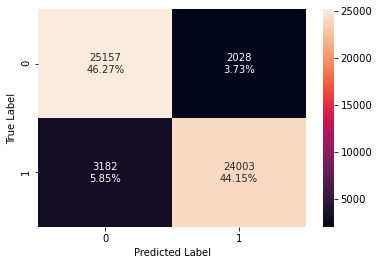

In [64]:
model_cnf_mtrx(best_tree_model,X_train_sm, y_train_sm)

Features Importance for Decision Tree Classifier ------------------------------------------------------------


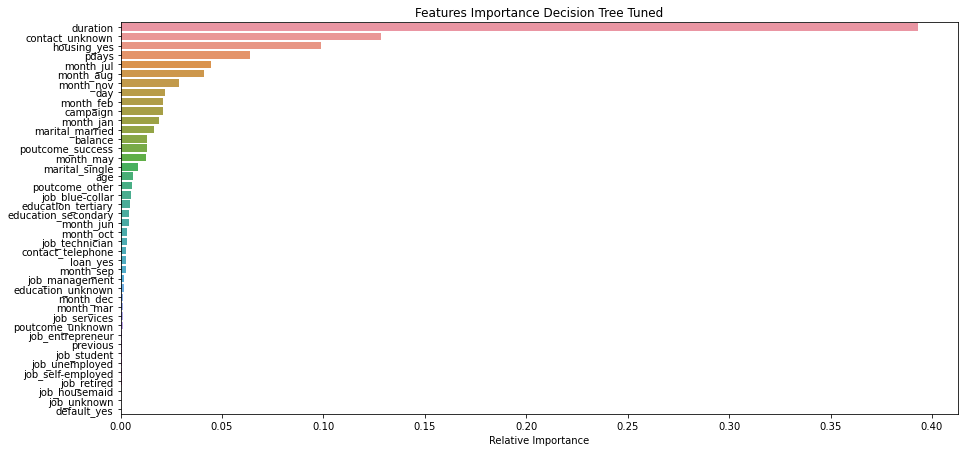

In [74]:
print('Features Importance for Decision Tree Classifier', '--'*30)

features_importance = pd.DataFrame(best_tree_model.feature_importances_, index = X_train_sm.columns,
                                  columns = ['Imp']).sort_values(by = 'Imp', ascending = False)
plt.figure(figsize = (15, 7.2))
ax = sns.barplot(features_importance["Imp"],features_importance.index)
ax.set_xlabel('Relative Importance')
ax.set_title('Features Importance Decision Tree Tuned')
plt.show()

### Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier
rnf_clf = RandomForestClassifier(n_jobs = -1, random_state = 42)
df_rnf = train_predict(rnf_clf, X_train_sm, y_train_sm, 'Random Forest Classifier without Tuning' )
df = df.append(df_rnf)
df


Model - Random forest classifier without tuning and fold 0
----------------------------------------
Training Score: 1.000
Test Score: 0.948
Accuracy Score: 0.948
Recall Score: 0.942
Prescision Score: 0.953
F1 Score: 0.947
ROC AUC Score: 0.948
Model - Random forest classifier without tuning and fold 1
----------------------------------------
Training Score: 1.000
Test Score: 0.945
Accuracy Score: 0.945
Recall Score: 0.942
Prescision Score: 0.947
F1 Score: 0.945
ROC AUC Score: 0.945
Model - Random forest classifier without tuning and fold 2
----------------------------------------
Training Score: 1.000
Test Score: 0.945
Accuracy Score: 0.945
Recall Score: 0.940
Prescision Score: 0.949
F1 Score: 0.944
ROC AUC Score: 0.945
Model - Random forest classifier without tuning and fold 3
----------------------------------------
Training Score: 1.000
Test Score: 0.945
Accuracy Score: 0.945
Recall Score: 0.941
Prescision Score: 0.948
F1 Score: 0.945
ROC AUC Score: 0.945
Model - Random forest classi

,Accuracy Score,Recall Score,Precision Score,F1 Score,ROC AUC Score
Logistic Regression without Tuning,0.866434,0.860438,0.871120,0.865525,0.866434
Logistic Regression with Hypertuning,0.894427,0.886555,0.900792,0.893601,0.894427
KNN without tuning,0.927957,0.909472,0.944387,0.926599,0.927957
KNN with tuning,0.933585,0.916461,0.948962,0.932427,0.933585
Naive Bayes without tuning,0.886390,0.898473,0.877278,0.887747,0.886390
Voting Classifier,0.930899,0.951591,0.913868,0.932315,0.930899
Voting Classifier with tuned Classifiers,0.933953,0.951223,0.919476,0.935073,0.933953
Decision Tree without tuning,0.917050,0.924113,0.911256,0.917631,0.917050
Decision Tree with tuning,0.923211,0.926356,0.920618,0.923454,0.923211
Random Forest Classifier without Tuning,0.945797,0.941843,0.949354,0.945583,0.945797


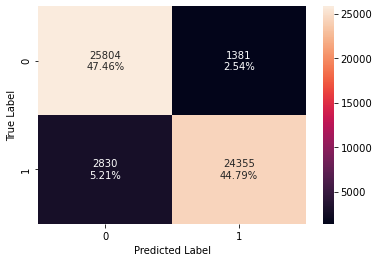

In [69]:
model_cnf_mtrx(rnf_clf,X_train_sm, y_train_sm)

In [70]:
## Tuning the Random Forest Classifier
from sklearn.model_selection import RandomizedSearchCV
rnf_clf = RandomForestClassifier(n_jobs = -1, random_state = 42)
params = {'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 200, num = 10)], 
          'max_depth': [int(x) for x in np.linspace(10,110, num = 11)],
         'min_samples_split' : [2, 5, 10],
         'min_samples_leaf' : [1, 2, 4],
         'bootstrap': [True, False]}
scoring = {'Recall_score': make_scorer(recall_score), 'f1_score': make_scorer(f1_score)}
skf = StratifiedKFold(n_splits = 3, shuffle = True, random_state = random_state)

rfc_grid = RandomizedSearchCV(rnf_clf, param_distributions = params, n_jobs = -1, cv = skf, scoring = scoring, refit = 'f1_score')
rfc_grid.fit(X_train_sm, y_train_sm)

print(rfc_grid.best_estimator_)
print(rfc_grid.best_params_)

RandomForestClassifier(bootstrap=False, max_depth=60, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=42)
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 60, 'bootstrap': False}


In [71]:
rnf_tuned = RandomForestClassifier(bootstrap=False, max_depth=60, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

df_rnf_tuned = train_predict(rnf_tuned, X_train_sm,y_train_sm, 'Random Forest Classifier with tuning')
df = df.append(df_rnf_tuned)
df

Model - Random forest classifier with tuning and fold 0
----------------------------------------
Training Score: 1.000
Test Score: 0.947
Accuracy Score: 0.947
Recall Score: 0.938
Prescision Score: 0.956
F1 Score: 0.947
ROC AUC Score: 0.947
Model - Random forest classifier with tuning and fold 1
----------------------------------------
Training Score: 1.000
Test Score: 0.945
Accuracy Score: 0.945
Recall Score: 0.941
Prescision Score: 0.949
F1 Score: 0.945
ROC AUC Score: 0.945
Model - Random forest classifier with tuning and fold 2
----------------------------------------
Training Score: 1.000
Test Score: 0.944
Accuracy Score: 0.944
Recall Score: 0.939
Prescision Score: 0.949
F1 Score: 0.944
ROC AUC Score: 0.944
Model - Random forest classifier with tuning and fold 3
----------------------------------------
Training Score: 1.000
Test Score: 0.947
Accuracy Score: 0.947
Recall Score: 0.942
Prescision Score: 0.952
F1 Score: 0.947
ROC AUC Score: 0.947
Model - Random forest classifier with tu

,Accuracy Score,Recall Score,Precision Score,F1 Score,ROC AUC Score
Logistic Regression without Tuning,0.866434,0.860438,0.871120,0.865525,0.866434
Logistic Regression with Hypertuning,0.894427,0.886555,0.900792,0.893601,0.894427
KNN without tuning,0.927957,0.909472,0.944387,0.926599,0.927957
KNN with tuning,0.933585,0.916461,0.948962,0.932427,0.933585
Naive Bayes without tuning,0.886390,0.898473,0.877278,0.887747,0.886390
Voting Classifier,0.930899,0.951591,0.913868,0.932315,0.930899
Voting Classifier with tuned Classifiers,0.933953,0.951223,0.919476,0.935073,0.933953
Decision Tree without tuning,0.917050,0.924113,0.911256,0.917631,0.917050
Decision Tree with tuning,0.923211,0.926356,0.920618,0.923454,0.923211
Random Forest Classifier without Tuning,0.945797,0.941843,0.949354,0.945583,0.945797


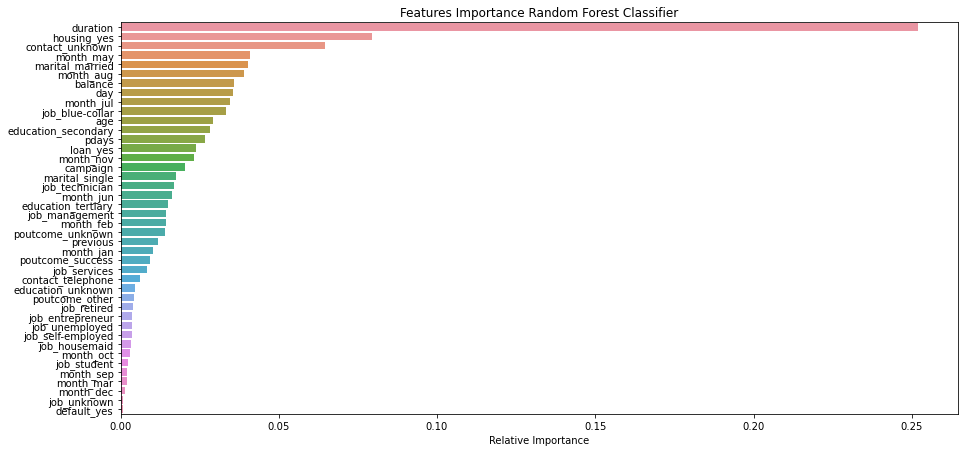

In [73]:
feature_importance = pd.DataFrame(rnf_tuned.feature_importances_, 
                                  index = X_train_sm.columns, columns = ["Imp"]).sort_values(by = 'Imp', ascending = False)
plt.figure(figsize = (15, 7.2))
ax = sns.barplot(feature_importance['Imp'], feature_importance.index)
ax.set_xlabel('Relative Importance')
ax.set_title('Features Importance Random Forest Classifier')
plt.show()

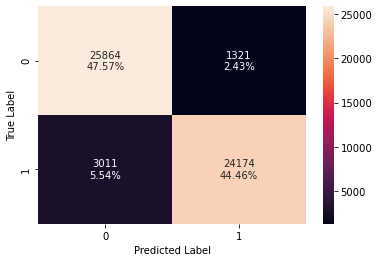

In [75]:
model_cnf_mtrx(rnf_tuned,X_train_sm, y_train_sm)

In [76]:
### Bagging Classifier
from sklearn.ensemble import BaggingClassifier

bgg_clf = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth = 3, random_state = random_state), 
                            bootstrap = True,
                         n_estimators = 50, random_state = random_state, n_jobs = -1)

df_bgg = train_predict(bgg_clf, X_train_sm, y_train_sm, 'Bagging Classifier')

df = df.append(df_bgg)
df

Model - Bagging classifier and fold 0
----------------------------------------
Training Score: 0.817
Test Score: 0.810
Accuracy Score: 0.810
Recall Score: 0.887
Prescision Score: 0.768
F1 Score: 0.823
ROC AUC Score: 0.810
Model - Bagging classifier and fold 1
----------------------------------------
Training Score: 0.804
Test Score: 0.810
Accuracy Score: 0.810
Recall Score: 0.907
Prescision Score: 0.760
F1 Score: 0.827
ROC AUC Score: 0.810
Model - Bagging classifier and fold 2
----------------------------------------
Training Score: 0.808
Test Score: 0.806
Accuracy Score: 0.806
Recall Score: 0.906
Prescision Score: 0.755
F1 Score: 0.824
ROC AUC Score: 0.806
Model - Bagging classifier and fold 3
----------------------------------------
Training Score: 0.804
Test Score: 0.803
Accuracy Score: 0.803
Recall Score: 0.900
Prescision Score: 0.754
F1 Score: 0.821
ROC AUC Score: 0.803
Model - Bagging classifier and fold 4
----------------------------------------
Training Score: 0.809
Test Score:

,Accuracy Score,Recall Score,Precision Score,F1 Score,ROC AUC Score
Logistic Regression without Tuning,0.866434,0.860438,0.871120,0.865525,0.866434
Logistic Regression with Hypertuning,0.894427,0.886555,0.900792,0.893601,0.894427
KNN without tuning,0.927957,0.909472,0.944387,0.926599,0.927957
KNN with tuning,0.933585,0.916461,0.948962,0.932427,0.933585
Naive Bayes without tuning,0.886390,0.898473,0.877278,0.887747,0.886390
Voting Classifier,0.930899,0.951591,0.913868,0.932315,0.930899
Voting Classifier with tuned Classifiers,0.933953,0.951223,0.919476,0.935073,0.933953
Decision Tree without tuning,0.917050,0.924113,0.911256,0.917631,0.917050
Decision Tree with tuning,0.923211,0.926356,0.920618,0.923454,0.923211
Random Forest Classifier without Tuning,0.945797,0.941843,0.949354,0.945583,0.945797


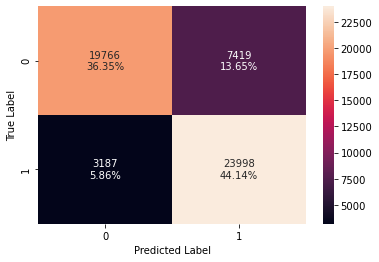

In [77]:
model_cnf_mtrx(bgg_clf,X_train_sm, y_train_sm)

### Adaboost Classifier

In [78]:
from sklearn.ensemble import AdaBoostClassifier
ab_clf = AdaBoostClassifier(n_estimators = 10, random_state = random_state)

df1 = train_predict(ab_clf, X_train_sm, y_train_sm, 'AdaBoost Classifier')
df = df.append(df1)
df

Model - Adaboost classifier and fold 0
----------------------------------------
Training Score: 0.874
Test Score: 0.872
Accuracy Score: 0.872
Recall Score: 0.887
Prescision Score: 0.861
F1 Score: 0.874
ROC AUC Score: 0.872
Model - Adaboost classifier and fold 1
----------------------------------------
Training Score: 0.874
Test Score: 0.873
Accuracy Score: 0.873
Recall Score: 0.896
Prescision Score: 0.857
F1 Score: 0.876
ROC AUC Score: 0.873
Model - Adaboost classifier and fold 2
----------------------------------------
Training Score: 0.874
Test Score: 0.874
Accuracy Score: 0.874
Recall Score: 0.894
Prescision Score: 0.860
F1 Score: 0.876
ROC AUC Score: 0.874
Model - Adaboost classifier and fold 3
----------------------------------------
Training Score: 0.875
Test Score: 0.871
Accuracy Score: 0.871
Recall Score: 0.895
Prescision Score: 0.854
F1 Score: 0.874
ROC AUC Score: 0.871
Model - Adaboost classifier and fold 4
----------------------------------------
Training Score: 0.873
Test S

,Accuracy Score,Recall Score,Precision Score,F1 Score,ROC AUC Score
Logistic Regression without Tuning,0.866434,0.860438,0.871120,0.865525,0.866434
Logistic Regression with Hypertuning,0.894427,0.886555,0.900792,0.893601,0.894427
KNN without tuning,0.927957,0.909472,0.944387,0.926599,0.927957
KNN with tuning,0.933585,0.916461,0.948962,0.932427,0.933585
Naive Bayes without tuning,0.886390,0.898473,0.877278,0.887747,0.886390
Voting Classifier,0.930899,0.951591,0.913868,0.932315,0.930899
Voting Classifier with tuned Classifiers,0.933953,0.951223,0.919476,0.935073,0.933953
Decision Tree without tuning,0.917050,0.924113,0.911256,0.917631,0.917050
Decision Tree with tuning,0.923211,0.926356,0.920618,0.923454,0.923211
Random Forest Classifier without Tuning,0.945797,0.941843,0.949354,0.945583,0.945797


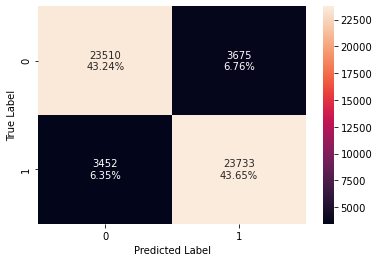

In [79]:
model_cnf_mtrx(ab_clf,X_train_sm, y_train_sm)

### Gradient Boosting Classifier


In [80]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
df_xgb = train_predict(xgb_clf, X_train_sm, y_train_sm, "Gradient Boosting Classifier")

df = df.append(df_xgb)
df

Model - Gradient boosting classifier and fold 0
----------------------------------------
Training Score: 0.974
Test Score: 0.942
Accuracy Score: 0.942
Recall Score: 0.943
Prescision Score: 0.941
F1 Score: 0.942
ROC AUC Score: 0.942
Model - Gradient boosting classifier and fold 1
----------------------------------------
Training Score: 0.974
Test Score: 0.942
Accuracy Score: 0.942
Recall Score: 0.942
Prescision Score: 0.943
F1 Score: 0.942
ROC AUC Score: 0.942
Model - Gradient boosting classifier and fold 2
----------------------------------------
Training Score: 0.975
Test Score: 0.944
Accuracy Score: 0.944
Recall Score: 0.946
Prescision Score: 0.942
F1 Score: 0.944
ROC AUC Score: 0.944
Model - Gradient boosting classifier and fold 3
----------------------------------------
Training Score: 0.973
Test Score: 0.943
Accuracy Score: 0.943
Recall Score: 0.947
Prescision Score: 0.939
F1 Score: 0.943
ROC AUC Score: 0.943
Model - Gradient boosting classifier and fold 4
------------------------

,Accuracy Score,Recall Score,Precision Score,F1 Score,ROC AUC Score
Logistic Regression without Tuning,0.866434,0.860438,0.871120,0.865525,0.866434
Logistic Regression with Hypertuning,0.894427,0.886555,0.900792,0.893601,0.894427
KNN without tuning,0.927957,0.909472,0.944387,0.926599,0.927957
KNN with tuning,0.933585,0.916461,0.948962,0.932427,0.933585
Naive Bayes without tuning,0.886390,0.898473,0.877278,0.887747,0.886390
Voting Classifier,0.930899,0.951591,0.913868,0.932315,0.930899
Voting Classifier with tuned Classifiers,0.933953,0.951223,0.919476,0.935073,0.933953
Decision Tree without tuning,0.917050,0.924113,0.911256,0.917631,0.917050
Decision Tree with tuning,0.923211,0.926356,0.920618,0.923454,0.923211
Random Forest Classifier without Tuning,0.945797,0.941843,0.949354,0.945583,0.945797


### Comparing Model Results

In [81]:
print('Conditional Formatting on the scores dataframe ', '--'*39)
display(df.style.background_gradient(cmap = sns.light_palette('green', as_cmap = True)))

Conditional Formatting on the scores dataframe  ------------------------------------------------------------------------------


,Accuracy Score,Recall Score,Precision Score,F1 Score,ROC AUC Score
Logistic Regression without Tuning,0.866434,0.860438,0.871120,0.865525,0.866434
Logistic Regression with Hypertuning,0.894427,0.886555,0.900792,0.893601,0.894427
KNN without tuning,0.927957,0.909472,0.944387,0.926599,0.927957
KNN with tuning,0.933585,0.916461,0.948962,0.932427,0.933585
Naive Bayes without tuning,0.886390,0.898473,0.877278,0.887747,0.886390
Voting Classifier,0.930899,0.951591,0.913868,0.932315,0.930899
Voting Classifier with tuned Classifiers,0.933953,0.951223,0.919476,0.935073,0.933953
Decision Tree without tuning,0.917050,0.924113,0.911256,0.917631,0.917050
Decision Tree with tuning,0.923211,0.926356,0.920618,0.923454,0.923211
Random Forest Classifier without Tuning,0.945797,0.941843,0.949354,0.945583,0.945797


Conclusion

The classification goal is to predict if the client will subscribe (yes/no) a term deposit.

Most of the ML models works best when the number of classes are in equal proportion since they are designed to maximize accuracy and reduce error. Thus, they do not take into account the class distribution / proportion or balance of classes. In our dataset, the clients subscribing to term deposit (class 'yes' i.e. 1) is 11.7% whereas those about 88.3% of the clients didn't subscribe (class 'no' i.e. 0) to the term deposit. In this project I have implemented SMOTE technique to balance the dataset. 
The SMOTE algorithm finds a record that is similar to the record being upsampled  and creates a synthetic record that is a randomly weighted average of the original record and the neighboring record, where the weight is generated separately
for each predictor. The number of synthetic oversampled records created depends on the oversampling ratio required to bring the data set into approximate balance with respect to outcome classes.

Following performance measures have been used - Accuracy, Precision, F1 Score, Recall Score and ROC AUC Score

The confusion matrix for class 1 (Subscribed) would look like:
	Predicted: 0 (Not Subscribed) 	Predicted: 1 (Subscribed)
Actual: 0 (Not Subscribed) 	True Negatives 	False Positives
Actual: 1 (Subscribed) 	False Negatives 	True Positives

Recall tells us out of all the positive records how many have been correctly identified as positive. Therefore, we would be using recall. Also important would be how is model behaving over the training and test scores across the cross validation sets.

Modeling was sub-divided in two phases, in the first phase we applied standard models (with and without the hyperparameter tuning wherever applicable) such as Logistic Regression, k-Nearest Neighbor and Naive Bayes classifiers. In second phase apply ensemble techniques such as Decision Tree, Voting Classifiers, Bagging, AdaBoost, Gradient Boosting and Random Forest classifiers. 


In the first phase (Standard machine learning models)

* Out of all the models tuned KNN model gives us best scores. Accuracy - 93.36%, Recall - 91.64%, Precision - 94.89%, F1 Score 93.24% and ROC-AUC 93.35%

In the second phase (Ensemble models)

* Tuned Random Forest Classifier gives us best Accuracy - 94.63% , Precision - 95.16%, F1 - 94.59% and ROC AUC -94.63% score.
    
* Gradient Boosting gives us best recall score of 94.46%

    
